# Euler Integration & the Lotka-Volterra Equations

## Introduction
This notebook first develops Euler integration as a technique for approximating differential equations using a computer. After that it uses this technique to graph the Lotka-Volterra equations a set of differential equations used to model the behaviour of a population of prey and predator species coupled in a basic ecological system. After the  simple model of a population that [the logistic map](https://www.benparry.ca/logistic-map) generates these represent the next natural layer of complexity. 

In [2]:
#Import all the libraries used throughout the notebook
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from pylab import *
%matplotlib inline

## Euler Integration
Euler integration is a way of approximating continuous functions ('differential equations') using discrete steps ('difference equations'). To do this we take a differential equation like $$dx/dt = -x$$ and convert it to a difference equation like $$ x_{t+1} = x_t + (1/tau)(-x_t) $$ where the values correspond to:

- $ x_{t+1} $: The value of $x$ in the next timestep
- $ x_t $: The value of $x$ in the current timestep
- $ tau $: The number of steps being used to approximate
- $ -x_t $: The

As you might imagine the generalised form of this equation is relatively straightforward. For any differential equation you have a difference equation such that:

$$ dx/dt = f(x) $$
$$ x_{t+1} = x_t + \frac{1}{tau}f(x_t) $$

Two examples of euler integration are given below.

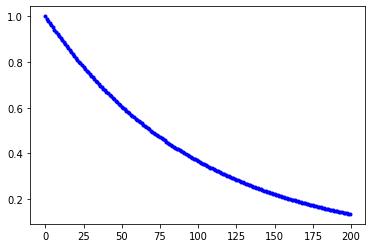

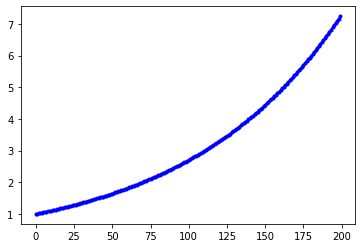

In [18]:
# Example using the difference equation approximation of the differential equation dx/dt = -x and dx/dt = x

# set up some basic equations
def basic_negative_func(x):
    return -x #models a 

def basic_positive_func(x):
    return x

# plot the euler approximation
def plot_euler(f,y,tau,steps):
    euler_values = []
    for n in range(steps):   
        euler_values.append(y) #append current value of y
        y = y + (1/tau)*f(y) #update the value of y 
    plt.plot(euler_values,'b.-')
    plt.show()
    
    
plot_euler(basic_negative_func,1,100,200)
plot_euler(basic_positive_func,1,100,200)

## Lotka-Volterra Equations
The Lotka-Volterra Equations describe the interactions of a predator and prey population through a pair of interacting differential equations. Specifically:

$$ dx/dt = \alpha x - \beta xy $$
$$ dy/dt = \delta xy - \gamma y $$

The values here correspond to

- $ x $: The prey population
- $ y $: The predator population
- $ \alpha $: The parameter for the growth rate of the prey population
- $ \beta $: The parameter for the interaction effect of the prey and predator for the prey
- $ \gamma $: The parameter for the dampening effect on the predator population
- $ \delta $: The parameter for the interaction effect of the prey and predator for the predator


You can get the intuition for how this works by thinking about a prey population like moose and a predator population like wolves. As the prey population grows it is negatively impacted by the prey population that is around. The predator population is supported by the prey population but if it gets too large then it will naturally reduce the prey population leading to it's own demise.

To model these as difference equations we can use the general formula described above, which gives us:

$$ x_{t+1} = x_t + \frac{1}{tau}(\alpha x_t - \beta x_t y_t) $$

$$ y_{t+1} = y_t + \frac{1}{tau}(\delta x_t y_t - \gamma y_t) $$

Note: As a point of interest the canonical example of a system which the Lotka-Volterra models model unreasonably well is the populations of hare and lynx as prey and predator 

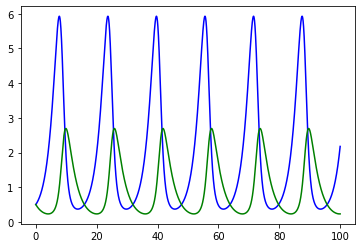

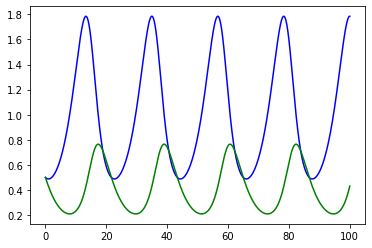

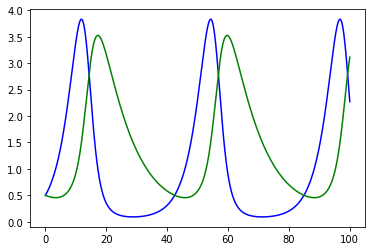

In [48]:
# Example of Euler integration for Lotka-Volterra Equations

def lotka_volterra(a, b, g, d, dt, time):
    #set initial conditions
    t = 0 #time
    x = 0.5 #prey
    y = 0.5 #predator
    
    t_list = [] #list to collect the timesteps
    x_list = [] #list to collect the prey population values
    y_list = [] #list to collect the predator population values
    
    for step in range(round(time/dt)):
        #add values
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)        
        
        #update values
        t += dt
        x = x + (a*x - b*x*y)*dt
        y = y + (d*x*y - g*y)*dt
    
    return t_list, x_list, y_list

def line_plot(t_list, x_list, y_list):
    plt.plot(t_list,x_list,'b',t_list,y_list,'g') #plot the populations next to each other
    plt.show()
    
t0, x0, y0 = lotka_volterra(0.5, 0.5, 0.4, 0.2, 0.0001, 100)
t1, x1, y1 = lotka_volterra(0.3, 0.7, 0.3, 0.3, 0.0001, 100)
t2, x2, y2 = lotka_volterra(0.3, 0.2, 0.1, 0.1, 0.0001, 100)

line_plot(t0, x0, y0)
line_plot(t1, x1, y1)
line_plot(t2, x2, y2)

Another way to visualise this is using an oscillation graph that shows how the two act in unison with prey on the x axis and predators on the y axis.

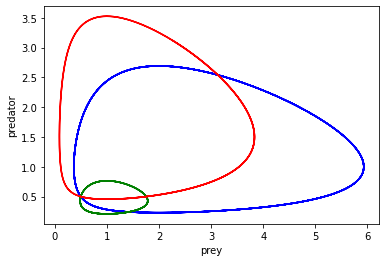

In [53]:
def oscillation_plot(x0,y0,x1,y1,x2,y2):
    plt.plot(x0, y0,'b', x1, y1, 'g',x2 ,y2 , 'r') #plot the populations relationship over time
    plt.xlabel('prey')
    plt.ylabel('predator')
    plt.show()
    
oscillation_plot(x0, y0, x1, y1, x2, y2)

##### Resources Used
- https://www.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/
- https://aubreymoore.github.io/ALBI345F17/pdfs/Lotka-Volterra-Model.html
- https://mc-stan.org/users/documentation/case-studies/lotka-volterra-predator-prey.html